In [65]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as n

import sys
import os
sys.path.insert(0, 'python')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
#base='kinase_sarfari'
base="gpcr_pdsp"
regression_file="{}_regressors.csv".format(base)
classification_file="{}_classifiers.csv".format(base)

In [67]:
dirname = os.getcwd()
regression_file = os.path.abspath(os.path.join(dirname, regression_file))
regression_df = pd.read_csv(regression_file)
select_fields = ['ProtocolName', 'LabelName', 'GroupValues']
regression_df.GroupValues.fillna('NA', inplace=True)
#regression_df.sort_values(select_fields)

In [68]:
regression_df.LabelName.value_counts()
print(regression_df.shape)
regression_df[regression_df.Correlation.isnull()]

(252, 9)


,ProtocolName,LabelName,GroupValues,Size,Estimator,RMSE,Correlation,IC50,MAE


In [69]:
regression_df = regression_df[~regression_df.Correlation.isnull()]

In [70]:
max_indices=regression_df.groupby(select_fields)["Correlation"].idxmax()
best_regression_df=regression_df.loc[max_indices]
#best_regression_df.sort_values(select_fields)

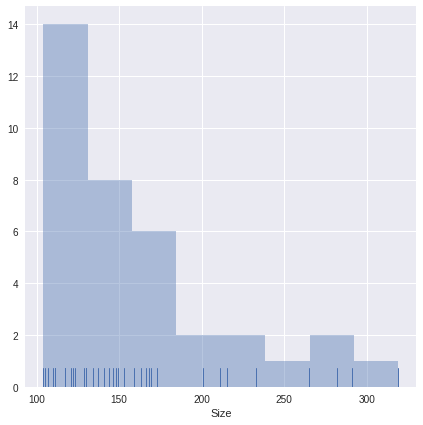

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
sns.distplot(best_regression_df.Size, rug=True, kde=False, norm_hist=False, ax=axes)

In [72]:
best_regression_df['Correlation'].describe()

count    36.000000
mean      0.705410
std       0.081022
min       0.425053
25%       0.662093
50%       0.713483
75%       0.761258
max       0.835715
Name: Correlation, dtype: float64

In [73]:
best_regression_df['RMSE'].describe()

count    36.000000
mean      0.957412
std       0.089358
min       0.760511
25%       0.916073
50%       0.969380
75%       1.011061
max       1.130387
Name: RMSE, dtype: float64

In [74]:
high_rms_df = best_regression_df[best_regression_df.RMSE > 10]
print(high_rms_df.ProtocolName.unique())
for _, value in high_rms_df.GroupValues.items():
    print(value)

[]


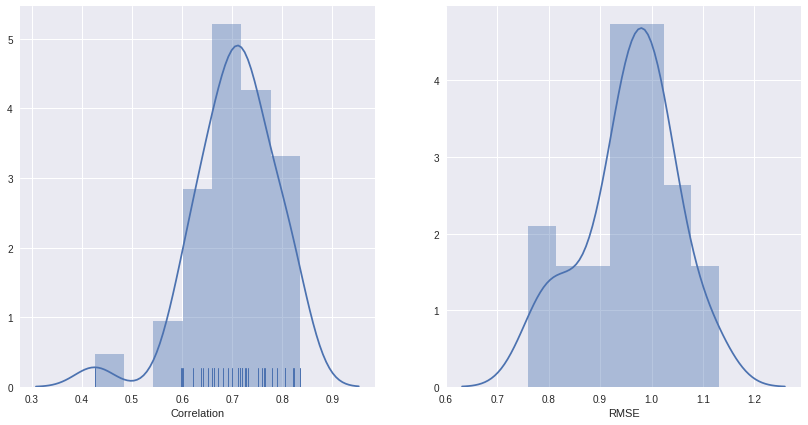

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
sns.distplot(best_regression_df['Correlation'], rug=True, kde=True, ax=axes[0])
sns.distplot(best_regression_df['RMSE'], rug=False, kde=True, ax=axes[1])

In [76]:
best_regression_df['Estimator'].value_counts()

RBF libSVM folded fingerprints regression        13
Weka RF folded fingerprints regression            8
RBF Smile SVM descriptors regression              4
Tanimoto Smile SVM regression                     4
Elastic Net on folded fingerprints regression     3
Poly Smile SVM fingerprints regression            2
Weka RF descriptors regression                    2
Name: Estimator, dtype: int64

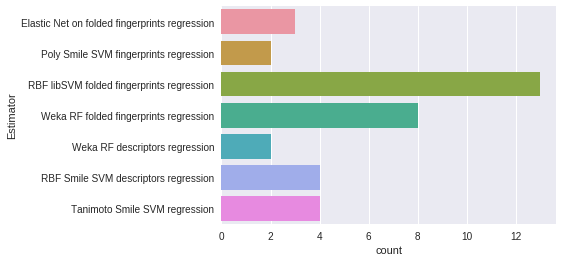

In [77]:
sns.countplot(y='Estimator', data=best_regression_df)

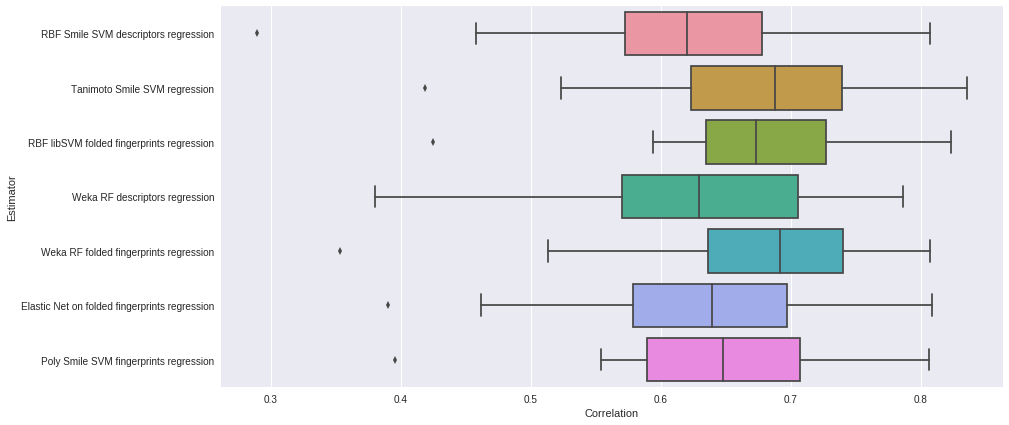

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 7))
sns.boxplot(y='Estimator', x='Correlation', data=regression_df, ax=axes)
#for tick in axes.get_xticklabels():
#    tick.set_rotation(80)

In [79]:
dirname = os.getcwd()
classification_file = os.path.abspath(os.path.join(dirname, 
                                    classification_file))
classification_df = pd.read_csv(classification_file)
classification_df.GroupValues.fillna('NA', inplace=True)
#classification_df.sort_values(select_fields)


In [80]:
max_indices=classification_df.groupby(select_fields)["ROC_AUC"].idxmax()
best_classification_df=classification_df.loc[max_indices]
#best_classification_df.sort_values(select_fields)

In [81]:
best_classification_df['ROC_AUC'].describe()

count    36.000000
mean      0.799224
std       0.092771
min       0.487766
25%       0.748956
50%       0.810387
75%       0.855984
max       0.956061
Name: ROC_AUC, dtype: float64

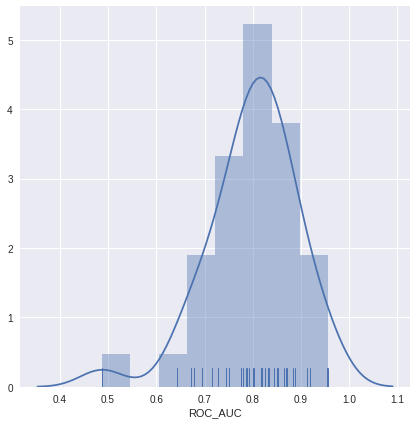

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
sns.distplot(best_classification_df['ROC_AUC'], rug=True, kde=True, ax=axes)

In [83]:
best_classification_df['Estimator'].value_counts()

Smile SVC Tanimoto classification      8
Smile Bernoulli NB classification      8
Weka RF on folded fp classification    7
Smile SVC RBF classification           5
Smile SVC Poly classification          5
Weka RF classification                 3
Name: Estimator, dtype: int64

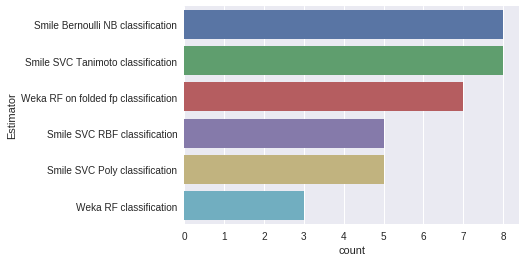

In [84]:
sns.countplot(y='Estimator', data=best_classification_df)

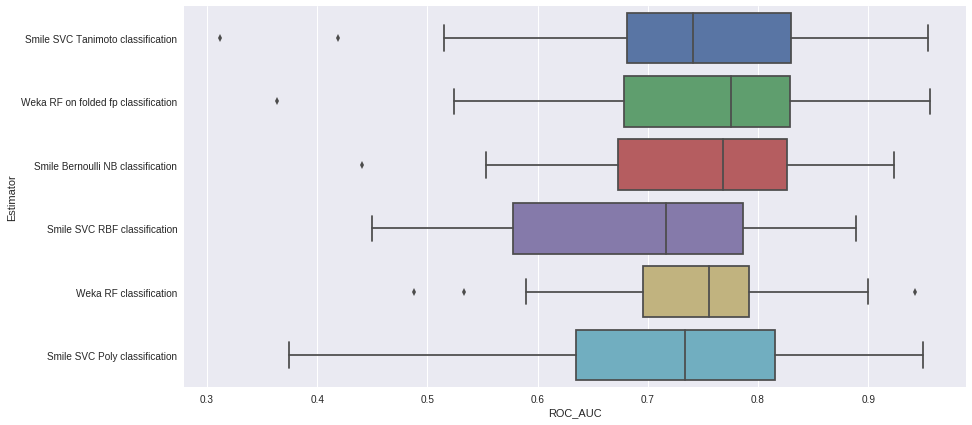

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 7))
sns.boxplot(y='Estimator', x='ROC_AUC', data=classification_df, ax=axes)